# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

In the exercise the consumer want to solve his maximization problem, where the consumer wishes to maximize consumption and leisure. To solve the model we use the scipy optimize function. When solving the model we use the monoticity condition stated in the exercise, this way we replace x with c in our constraint such that we only solve for consumption and leisure in our optimization problem stated below.

Using this constraint we define a value of choice function that minimize the negative utility function. We minimize for a given value of w, and can therefore find values for c and l.

In [3]:
# Defining the utility function for the individual consumer

def u_func(c,l):
    return np.log(c) - (v * (l**(1+1/epsilon))/(1+1/epsilon))

In [4]:
# Defining all given variables and the variable w. W is set to a half, in order for us to test our solution for equation 1

m = 1
v = 10
epsilon = 0.3
tau_0 = 0.4
tau_1 = 0.1
kappa = 0.4
w=0.5

In [5]:
# Defining a function, that will print the results for c, l and w

def print_solution(c,l,w):
    print(f'c = {c:.2f}')
    print(f'l = {l:.2f}')
    print(f'w  = {w:.2f}')

In [6]:
# Defining the value of choice function, where we use that there is monotonically increasing in consumption, thus c = x 
def value_of_choice(l,m,v,epsilon,tau_0,tau_1,kappa,w):
    c = m+w*l-(tau_0*w*l+tau_1*np.maximum(w*l-kappa,0))
    return -u_func(c,l) # Returning minus the utility function, as we minimize not maximize

# Defining the solver function, given method, bounds and arguments
solver = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,v,epsilon,tau_0,tau_1,kappa,w))

# Defining l and c given the solver
l = solver.x # l is found throguh the solve function
c = m+w*l-(tau_0*w*l+tau_1*np.maximum(w*l-kappa,0)) # c is found through the function stated in the exercise and thus indirectly from the solve function as l is stated in the funtion
print_solution(c,l,w)

c = 1.10
l = 0.34
w  = 0.50


# Question 2

To find the optimal choices of consumption and leisure for 10.000 individuals. We loop the optimization problem above 10.000 times over different values for values of w between 0.5 and 1.5, as it is given in the exercise that the wage is between 0.5 and 1.5, and from that we find the optimal l and c for each w.

From the figures in the buttom of this question, it can be seen that the optimal l and c are increasing in w. Though c and l is increasing in w there is a kink around a wage of one for both consumption and leisure. 

In [7]:
# Setting the number for the empty tuples as stated in the exercise
N=10000

#Creating empty tuples for c, l and w that matches the number of individuals in the population
shape_tuple = (N)
c_values=np.empty(shape_tuple)
l_values=np.empty(shape_tuple)
w_values=np.empty(shape_tuple)

# Reusing the code from question 1 where the individual maximizes their consumption and wage
def u_func(c,l):
   return np.log(c) - (v * (l**(1+1/epsilon))/(1+1/epsilon))

def value_of_choice(l,m,v,epsilon,tau_0,tau_1,kappa,w):
    c = m+w*l-(tau_0*w*l+tau_1*np.maximum(w*l-kappa,0))
    return -u_func(c,l)

# Repeating the solver function 10.000 times for values of w between 0.5 and 1.5
for i,w in enumerate(np.linspace(0.5,1.5,10000)):

    solver = optimize.minimize_scalar(
        value_of_choice,method='bounded',
        bounds=(0,1),args=(m,v,epsilon,tau_0,tau_1,kappa,w))

    l = solver.x
    c = m+w*l-(tau_0*w*l+tau_1*np.maximum(w*l-kappa,0))

# Saving the different values for l and c given by the solver into the empty tuples
    c_values[i] = c
    l_values[i] = l
    w_values[i] = w

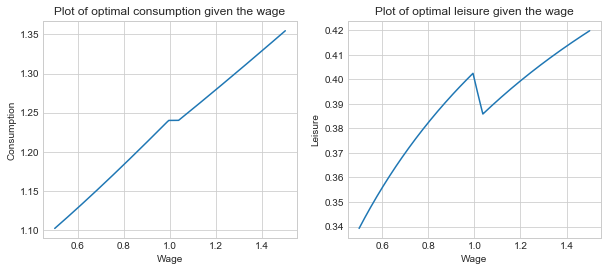

In [10]:
# Creating the figure
fig = plt.figure(figsize=(10,4)) # Defining figure size

# Defining the left plot
ax_left = fig.add_subplot(1,2,1)  

ax_left.plot(w_values,c_values) #Plotting the wage on the x-axies and consumption on the y-axies

# Giving titles to the left plots axies
ax_left.set_title('Plot of optimal consumption given the wage')
ax_left.set_xlabel('Wage')
ax_left.set_ylabel('Consumption')
ax_left.grid(True)

# Defining the right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_values,l_values) #Plotting the wage on the x-axies and leisure on the y-axies

# Giving titles to the rigth plots axies
ax_right.set_title('Plot of optimal leisure given the wage')
ax_right.set_xlabel('Wage')
ax_right.set_ylabel('Leisure')
ax_right.grid(True)

# Question 3

To calculate the tax revenue we reuse the code from question 2 such that we can calculate the tax revenue for 10.000 persons for the different values of w, c and l. We find the tax revenue by defining a sum function for the tax revenue. When running the sum function with the parameter values stated in question 1, we find that the tax revenue is 1630.19

In [11]:
# Defining a tax revenue function, that uses w_values and l_values from the question above, to find the sum of the tax revenue

def tax_revenue(w_values,l_values,tau_0,tau_1,kappa):
    revenue = np.sum(tau_0*w_values*l_values + tau_1*np.maximum(w_values*l_values-kappa,0))
    return revenue

# Printing the value of the tax revenue
print(f'Sum of the tax revenue: {tax_revenue(w_values,l_values,tau_0,tau_1,kappa):.2f}')

Sum of the tax revenue: 1630.19


# Question 4

To see the effect of a change in the elasticity from 0.3 to 0.1 on the tax revenue, we reuse the code from question 2 and 3. We can reuse the code from question 2 and 3 as we can simply restate epsilon in the models and define new empty lists. When changing epsilon to 0.1 we find a tax revenue of 2171.03, thus a lower elasticity increases the tax revenue.

In [12]:
# Reusing code from question 2 and 3. 

# Defining a variable epsilon_2, and gives this the new value we want to find the tax revenue for epsilon = 0.1
epsilon_2 = 0.1

# We rename the empty tuples such that we do not overwrite the previous stated tuples
shape_tuple = (N)
c_1_values=np.empty(shape_tuple)
l_1_values=np.empty(shape_tuple)
w_1_values=np.empty(shape_tuple)

# Reusing code from question 2
def u_func(c,l):
    return np.log(c) - (v * (l**(1+1/epsilon))/(1+1/epsilon_2))

def value_of_choice(l,m,v,epsilon_2,tau_0,tau_1,kappa,w):
    c = m+w*l-(tau_0*w*l+tau_1*np.maximum(w*l-kappa,0))
    return -u_func(c,l)

for i,w in enumerate(np.linspace(0.5,1.5,10000)):

    solver = optimize.minimize_scalar(
        value_of_choice,method='bounded',
        bounds=(0,1),args=(m,v,epsilon_2,tau_0,tau_1,kappa,w))

    l = solver.x
    c = m+w*l-(tau_0*w*l+tau_1*np.maximum(w*l-kappa,0))

    c_1_values[i] = c
    l_1_values[i] = l
    w_1_values[i] = w

In [13]:
# Again defining the tax revenue with the new tuples, in order to find the sum of the tax revenue

def tax_revenue_1(w_1_values,l_1_values,tau_0,tau_1,kappa):
    revenue = np.sum(tau_0*w_1_values*l_1_values + tau_1*np.maximum(w_1_values*l_1_values-kappa,0))
    return revenue

print(f'Sum of the tax revenue: {tax_revenue_1(w_1_values,l_1_values,tau_0,tau_1,kappa):.2f}')

Sum of the tax revenue: 2171.03


# Question 5

In order to find the optimal amount value of tau_0, tau_1 and kappa we use a multi-dimensional constrained solver. 

We know that the tax rate will never be negative, as the state will then need to pay the citizens the tax. Futhermore we know that the tax rate can never be above 1, as then the government will take more than the citizen earn in wages. Thus we have that 0<tau<1. Kappa is the set as the cut-off value that indicate whether an individual should pay top tax or not, thus this can also never be negative.

In [15]:
# Defining a function, that will print the results for tau_0, tau_1, kappa and tax revenue
def print_solution_1(tau_0,tau_1,kappa,Tax):
    print(f'tau_0 = {tau_0:.2f}')
    print(f'tau_1 = {tau_1:.2f}')
    print(f'kappa  = {kappa:.2f}')
    print(f'Tax  = {Tax:.2f}')

In [16]:
# Defining the optimal tax function
def optimal_tax(x,w_values,l_values):
    tau_0 = x[0]
    tau_1 = x[1]
    kappa = x[2]
    return -tax_revenue(w_values,l_values,tau_0,tau_1,kappa)

initial_guess = (0.4,0.1,0.4) # Setting an initial guess
bounds = ((0,1),(0,1),(0,1.5)) #Setting bounds that matches the asumptions stated above

# Defining our solver that solves the optimization problem that finds the optimal level of tax rate and cut-off value
sol_case2 = optimize.minimize(
    optimal_tax, initial_guess,
    method='SLSQP', bounds=bounds, args=(w_values,l_values))

# Defining tau_0, tau_1 and kappa given the solver
tau_0 = sol_case2.x[0]
tau_1 = sol_case2.x[1]
kappa = sol_case2.x[2]

# Defining the optimal tax revenue given the optimal level of tau_0, tau_1 and kappa
Tax = tax_revenue(w_values,l_values,tau_0,tau_1,kappa)

# Printing the values of tau_0, tau_1, kappa and tax revenue
print_solution_1(tau_0,tau_1,kappa,Tax)

tau_0 = 1.00
tau_1 = 1.00
kappa  = 0.00
Tax  = 7887.86


# Conclusion

By solving the consumer maximization problem we see that thier optimal level of consumption and leisure is increasing in w. Though we find a kink around the cut-off around the wage of 1, where leisure falls but then starts increasing again. Futhermore we find that the tax revenue for the elasticity of 0.3 is 1630 while the tax revenue is 2171 for the elasticity of 0.1. Thus for a lower level of elasticity of the labour supply we find a higher tax revenue, this is the case as a lower elasticity implie that the individuals react less to a change in the tax rate.